# Insurance Premium Prediction 

 The aim of this project is to develop an effective predictive model for estimating individual medical costs billed by health insurance.The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charges as a dependent feature.This analysis seeks to determine the superior model for accurately forecasting medical costs, offering valuable insights into the influential factors and enhancing the precision of future cost predictions in the realm of health insurance.

## Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [3]:
insurance_data=pd.read_csv("D:/DATASCIENCE/MLQuest/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* This data set contains 4 numerical columns: ['age', 'bmi', 'children', 'charges']
* This data set contains 3 categorical columns: ['sex', 'smoker', 'region']

## Data Exploration

In [4]:
insurance_data.head() #getting the top 5 columns

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.shape #getting the number of rows and columns

(1338, 7)

In [6]:
insurance_data.columns #getting the column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
insurance_data.info() #concise summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_data.isnull().sum() #finding the number of null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing Values in the data.

In [9]:
insurance_data.describe() #basic statistics of the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From above we can see that distribution of Age is between 18 to 64.

Text(0, 0.5, 'Count')

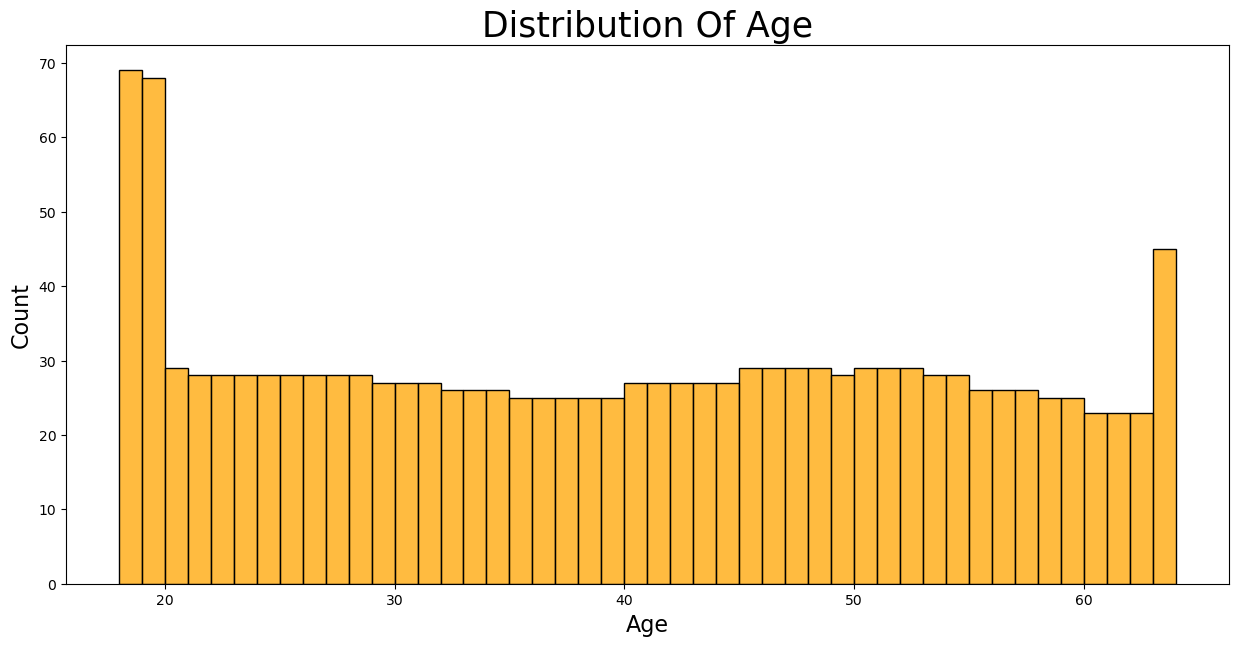

In [10]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=insurance_data,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

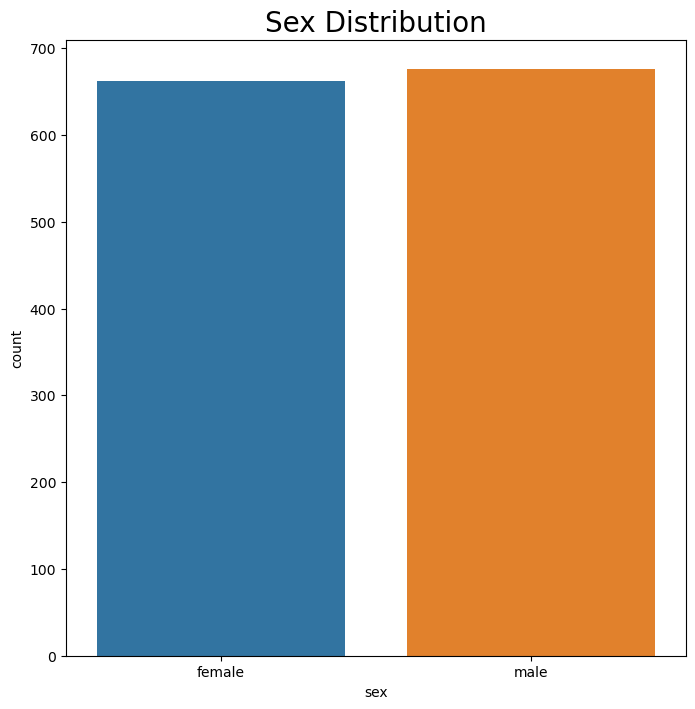

In [11]:
# Sex Distribution in the gender column
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution',fontsize=20)
plt.show()

In [12]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

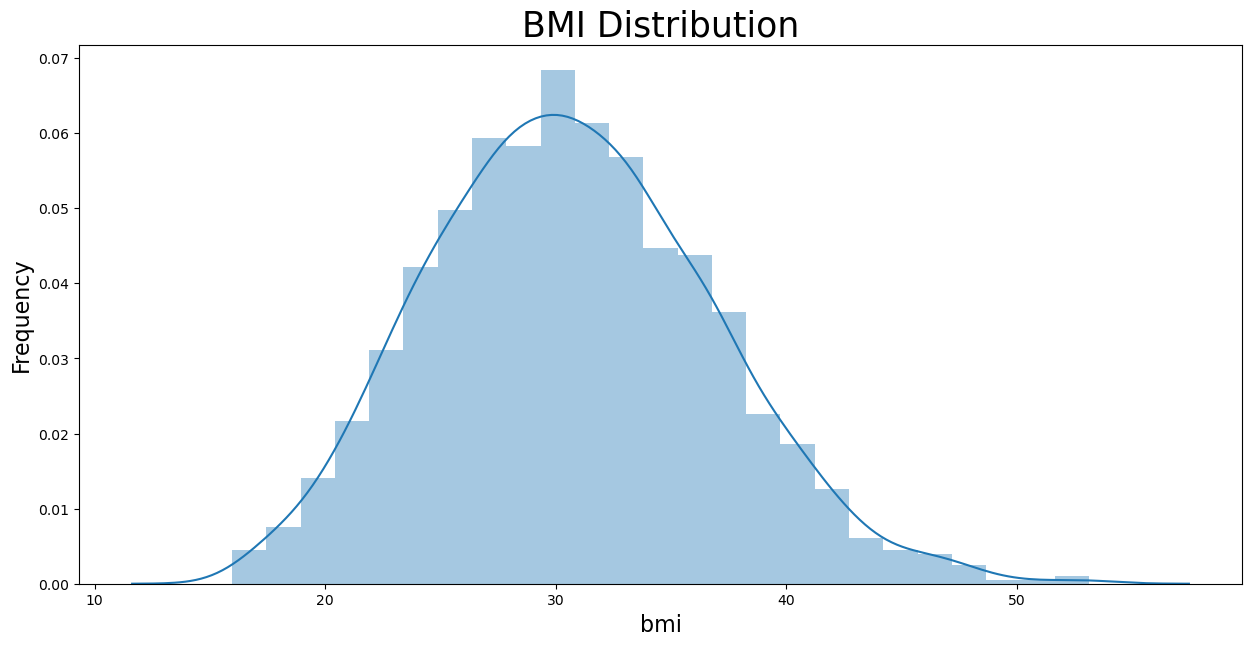

In [13]:
# Distribution of BMI
plt.figure(figsize=(15,7))
plt.title('BMI Distribution', fontsize=25)
gph=sns.distplot(insurance_data['bmi'])
gph.set_xlabel("bmi", fontsize=16)
gph.set_ylabel("Frequency", fontsize=16)
plt.show()

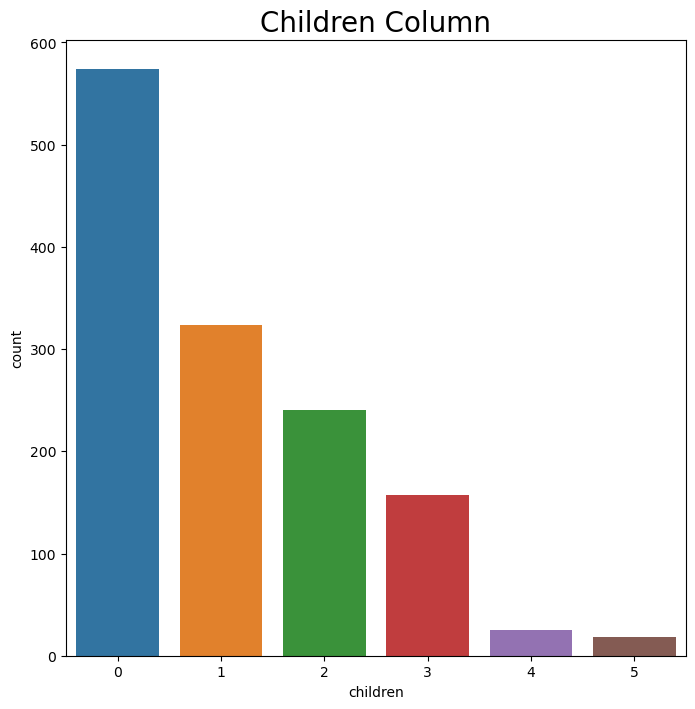

In [14]:
# Count of values in the children column
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=insurance_data)
plt.title('Children Column',fontsize=20)
plt.show()

In [15]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

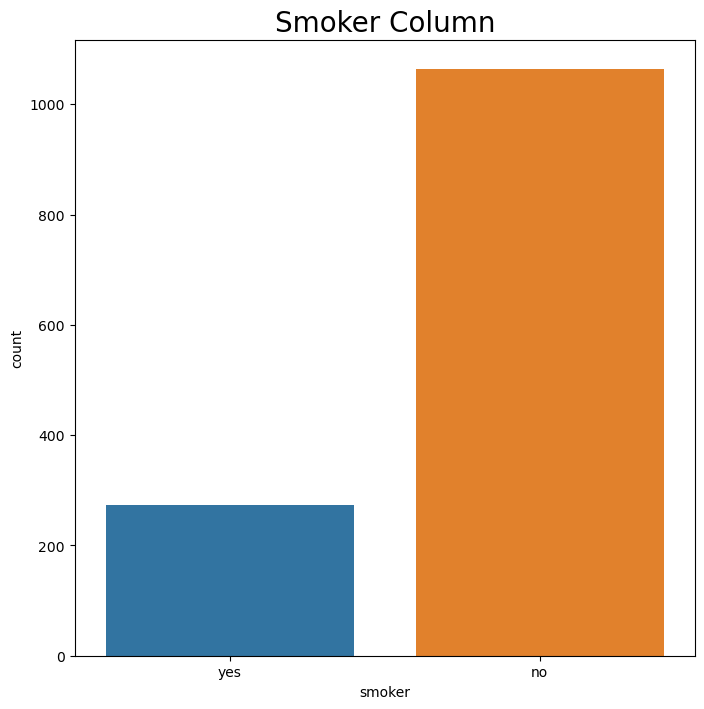

In [16]:
# Count of values in the smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker Column',fontsize=20)
plt.show()

In [17]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

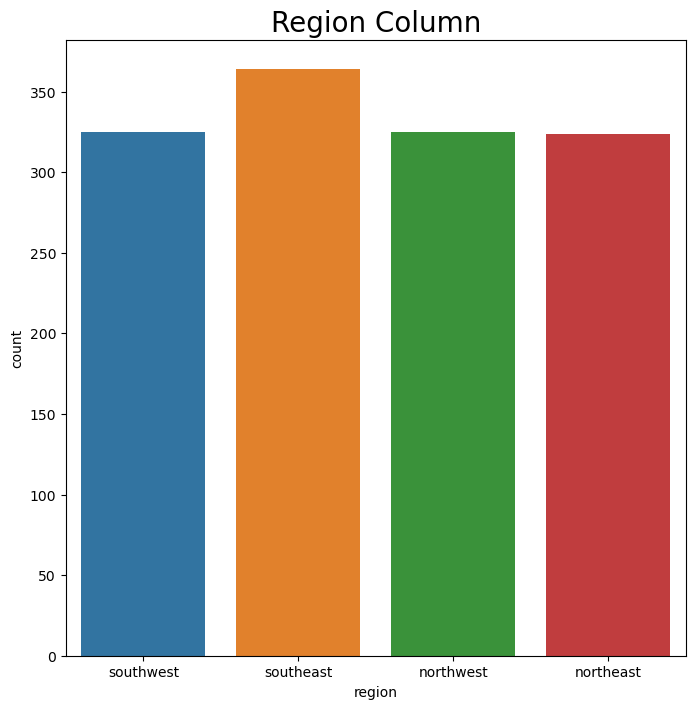

In [18]:
# Count of values in the region column
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=insurance_data)
plt.title('Region Column',fontsize=20)
plt.show()

In [19]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

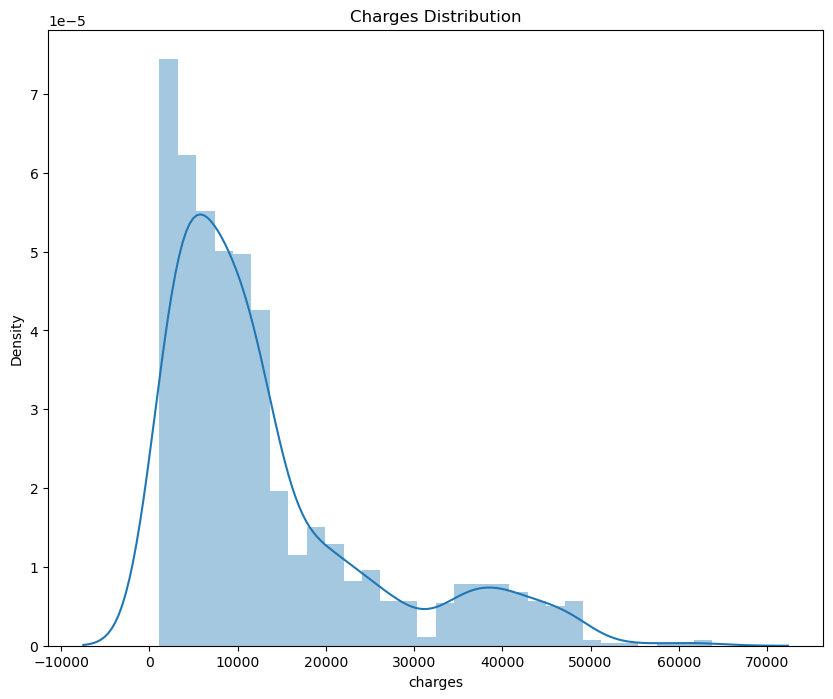

In [20]:
#distribution of charges value
plt.figure(figsize=(10,8))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

In [ ]:
# Replacing string values with numerical values

insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [24]:
# Splitting the features and target
x=insurance_data.drop(columns='charges',axis=1)
y=insurance_data['charges']

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
# Splitting the data:training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Linear Regression

### Model Training

In [29]:
# Loading the linear regression model
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [31]:
# Prediction on training data
training_data_prediction=model.predict(x_train)

In [32]:
print("Predictions on training data:")
training_data_prediction

Predictions on training data:


array([33722.4837812 ,  3381.74874825, 30441.2520079 , ...,
        5847.88494909,  4817.49393815,  2581.2233027 ])

In [33]:
# R squared value of training data
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value of training data',r2_train)

R squared value of training data 0.7367384013702084


In [34]:
# Prediction on testing data
test_data_prediction=model.predict(x_test)

In [35]:
print("Predictions on test data:")
test_data_prediction

Predictions on test data:


array([11314.55649519,  9505.58891773, 38360.58383815, 16449.59640407,
        7117.89379839,  3625.40607824,  1220.82286678, 14546.23034668,
        9175.38911418,  7670.45320003,  4137.50251413, 10460.04576612,
        8937.02424204,  3821.65458782, 28121.9236222 , 10727.21593537,
       11492.35478865,  5741.04672175,  8414.69398732, 26801.81210287,
       33848.38568362, 14527.74171334, 11390.85379777, 32180.53730024,
        4178.01083124,  8887.21190336,   744.58537141,  9803.59635122,
        3791.46686472, 10607.59311526,  9175.47238397, 40104.40338991,
       15833.68613995, 14020.43761781, 24429.83851219,  4812.11477907,
       12615.54616137, 30908.11622546, 33731.94909917,  3794.59535793,
        3636.61843919,  4007.71037332, 30202.73392169, 39695.63095105,
       27824.21897431,  5247.42299012, 10616.83293985,  8014.84064366,
        3241.96543926, 10245.23684269,  5352.03102501,  3581.85961167,
       33183.50761881, 38119.35302412, 16065.17314482,  6802.84856411,
      

In [36]:
# R squared value of test data
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value of test data',r2_test)

R squared value of test data 0.7989875396812892


In [37]:
RMSE_model_train = sqrt(mean_squared_error(y_train, training_data_prediction))
print("RMSE for Training Data: ", RMSE_model_train)

RMSE for Training Data:  6143.517066583471


In [38]:
RMSE_model_test = sqrt(mean_squared_error(y_test, test_data_prediction))
print("RMSE for Testing Data: ", RMSE_model_test)

RMSE for Testing Data:  5655.714387837686


In [39]:
# Predicting from a data sample
input_data=(31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print (prediction)
print('The insurance is USD',prediction[0])

[3791.46686472]
The insurance is USD 3791.466864716258


## XGBoost

In [40]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123,verbosity=0)

### Model Training

In [41]:
# Fitting the model
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [42]:
# Prediction on training data
prediction_train=model.predict(x_train)

In [43]:
print("Predictions on training data:")
prediction_train

Predictions on training data:


array([33722.4837812 ,  3381.74874825, 30441.2520079 , ...,
        5847.88494909,  4817.49393815,  2581.2233027 ])

In [44]:
# R squared value of training data
R2Score_train =metrics.r2_score(y_train, prediction_train)
print('R squared value of training data',R2Score_train)

R squared value of training data 0.7367384013702084


In [45]:
# Prediction on test data
prediction_test = xgb_r.predict(x_test)

In [46]:
print("Predictions on test data:")
prediction_test

Predictions on test data:


array([11608.477 , 12723.418 , 45150.125 , 13340.557 , 11402.73  ,
       10098.824 ,  2684.4272, 12950.726 ,  8054.4556,  7667.2183,
        7495.085 , 17023.023 ,  8534.584 ,  5389.838 , 26667.793 ,
       12713.551 , 12722.671 ,  6843.151 ,  6356.3096, 34120.887 ,
       23343.434 , 16881.504 , 11528.418 , 29258.43  ,  5685.339 ,
        7958.1753,  7151.0293,  8160.8013,  4390.8916, 12152.769 ,
        6989.05  , 46371.055 , 14698.569 , 11655.373 , 15511.361 ,
        4930.602 ,  9187.229 , 35831.066 , 38775.29  ,  3308.0017,
       10400.893 ,  4088.823 , 19380.54  , 46750.582 , 35985.242 ,
        6614.904 , 12713.551 ,  6781.074 ,  5606.211 , 12535.865 ,
        5129.15  ,  7261.117 , 27709.6   , 44291.81  , 11389.906 ,
        6998.7104,  3994.786 , 13104.69  ,  9855.765 , 14409.607 ,
        2910.1272, 43383.82  , 18132.488 , 12617.67  , 12444.59  ,
        9178.239 , 34153.84  , 39355.195 ,  3602.1917, 10381.167 ,
       14130.002 , 13002.622 , 17669.246 , 16110.124 , 13455.1

In [47]:
# R squared value of test data
R2Score_test =metrics.r2_score(y_test, prediction_test)
print('R squared value of test data',R2Score_test)

R squared value of test data 0.8911559620173503


In [48]:
RMSE_model_train = sqrt(mean_squared_error(y_train, prediction_train))
print("RMSE for Training Data: ", RMSE_model_train)

RMSE for Training Data:  6143.517066583471


In [49]:
RMSE_model_test = sqrt(mean_squared_error(y_test, prediction_test))
print("RMSE for Testing Data: ", RMSE_model_test)

RMSE for Testing Data:  4161.772178191289


# Conclusion

* XGBoost emerges as the superior model for this specific task. It exhibits a higher R2 score, indicating better explanatory power, and a lower RMSE, suggesting more accurate   predictions. Therefore, for the given dataset and problem, XGBoost is the preferred choice for modeling and prediction compsared to Linear Regression.